In [1]:
import os
import sys
import re
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import seaborn as sns
%matplotlib inline

# Enable relative imports
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from text.analytics import TermFreqInverseDocFreq

/Users/jeremy/anaconda/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


### Load Fuana Dataset
Data has been collected in batches. We need to load each batch and merge them all into one `DataFrame`

In [2]:
filenames = [
    'fauna55k.csv.gz', 
    'fauna8k.csv.gz', 
    'fauna20k.csv.gz',
    'fauna3.1k.csv.gz',
    'fauna5.8k.csv.gz'
]

dataframes = []
for f in filenames:
    df = pd.read_csv('../data/{}'.format(f), compression='gzip')
    dataframes.append(df)

### Clean up the data to remove duplicates, nulls and noise (wikipedia redirects)

In [59]:
fauna = pd.concat(dataframes)
print('fauna.shape before nulls removed', fauna.shape)
fauna = fauna[fauna['class'].notnull()]
fauna = fauna[fauna['text'].notnull()]
fauna = fauna[fauna['order'].notnull()]
print('fauna.shape after nulls removed', fauna.shape)
print('fauna.shape before duplicates removed', fauna.shape)
fauna = fauna.drop_duplicates(['page-id'], keep='first')
print('fauna.shape after duplicates removed', fauna.shape)
fauna = fauna.drop(fauna[fauna['text'].str.contains('This is a redirect')].index)
print('fauna.shape after redirects dropped', fauna.shape)
fauna = fauna.drop('superorder', axis=1)
fauna = fauna.set_index(keys=['page-id'])
fauna.head()

fauna.shape before nulls removed (92996, 11)
fauna.shape after nulls removed (75493, 11)
fauna.shape before duplicates removed (75493, 11)
fauna.shape after duplicates removed (50765, 11)
fauna.shape after redirects dropped (42451, 11)


,class,family,genus,kingdom,order,phylum,species,text,title
page-id,,,,,,,,,
3451749,amphibia,ranidae,rana,animalia,anura,chordata,rboylii,The foothill yellow-legged frog (Rana boylii) ...,Foothill yellow-legged frog
1369072,mammalia,bovidae,pantholopshodgson18342,animalia,artiodactyla,chordata,phodgsonii,The Tibetan antelope or chiru (Pantholops hodg...,Tibetan antelope
26625724,mammalia,bovidae,damaliscus,animalia,artiodactyla,chordata,dsuperstes,The Bangweulu tsessebe (Damaliscus superstes) ...,Bangweulu tsessebe
1709509,mammalia,tayassuidae,catagonusameghino1904,animalia,artiodactyla,chordata,cbrachydontuscmetropolitanuscstenocephaluscwag...,The Chacoan peccary or tagua (Catagonus wagner...,Chacoan peccary
262734,aves,opisthocomidae,opisthocomusilliger1811,animalia,opisthocomiformes,chordata,ohoazin,"The hoatzin (Opisthocomus hoazin), also known ...",Hoatzin


### Visualize the number of records in each class

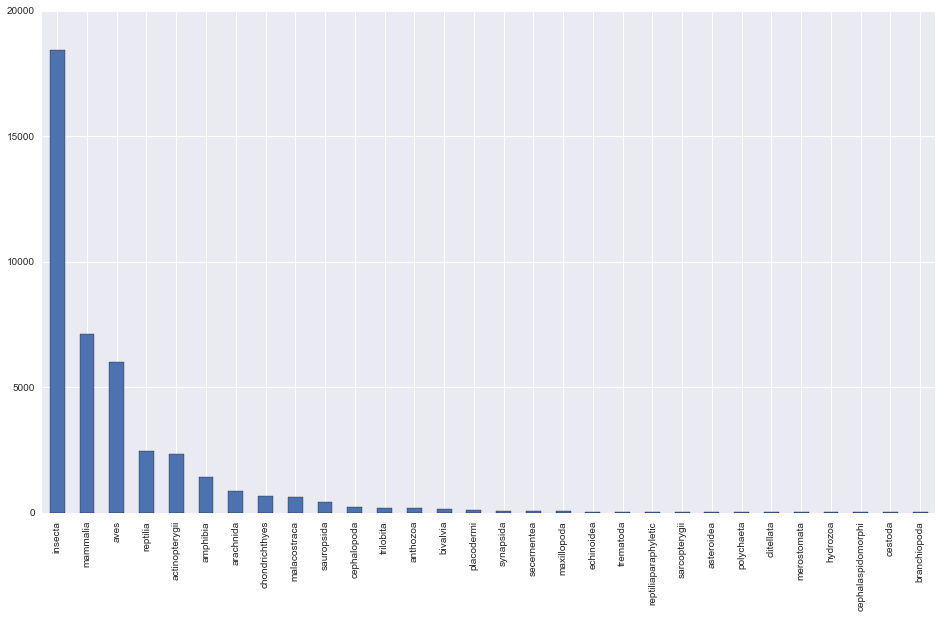

In [68]:
classes = fauna['class'].value_counts()
figure(figsize=(16, 9))
classes[0:30].plot(kind="bar")

## Basic filtering on various fields

In [67]:
fauna[fauna['genus']=='otocyon']

,class,family,genus,kingdom,order,phylum,species,text,title
page-id,,,,,,,,,
400378,mammalia,canidae,otocyon,animalia,carnivora,chordata,omegalotis,The bat-eared fox (Otocyon megalotis) is a spe...,Bat-eared fox


### Create a TFIDF Table

In [63]:
tfidf = TermFreqInverseDocFreq()
tfidf.create(fauna, 'text', True)

### Plot the term count over iterations

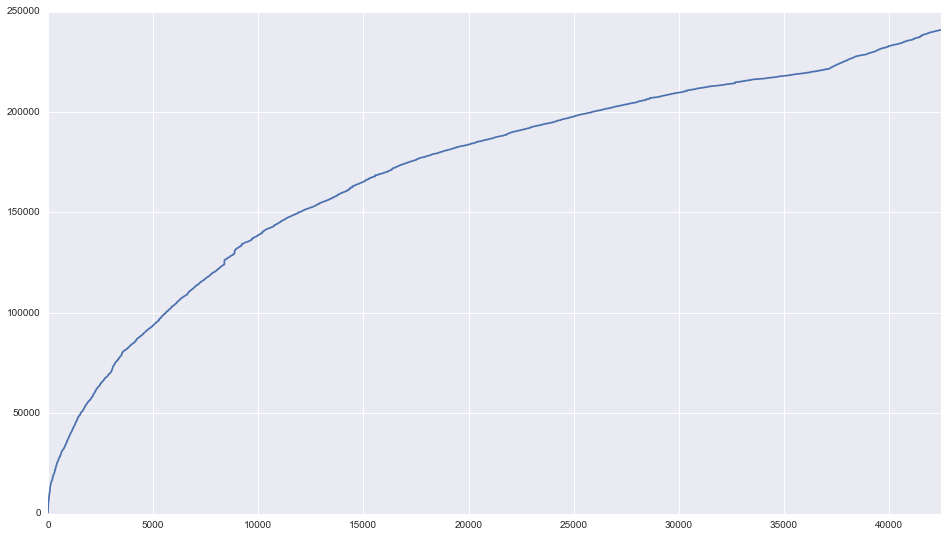

In [64]:
term_count_series = pd.Series(tfidf.term_count_over_iterations)
figure(figsize=(16, 9))
term_count_series.plot()